(30.0, 220.0)

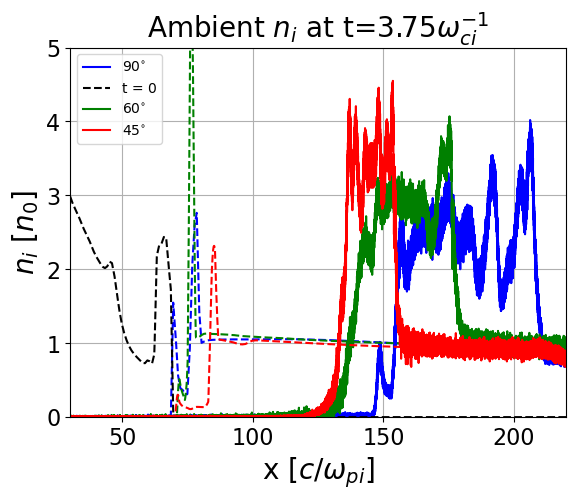

In [17]:
import osh5def
import osh5vis
import osh5io
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import os
import sys
sys.path.append('../FLASH_OSIRIS_interface')
from FLASH_OSIRIS_define import FLASH_OSIRIS


# Set the default font size for axis labels
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
# Set the default font size for tick labels
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

t = 150
ylims = (0, 5)
xlims = (30, 220)
ion_inertial_length = np.sqrt(380)

dir90 = Path('../simulations/save_data/magshockz-v3.2.1d-7.14debye/MS')
if not dir90.exists():
    raise FileNotFoundError(f"Data directory {dir90} does not exist.")
interface90 = pickle.load(open(f'{dir90.parent}/instance.pkl', 'rb'))

dir60 = Path('../simulations/save_data/magshockz-v3.2.1d-60degrees/MS')
if not dir60.exists():
    raise FileNotFoundError(f"Data directory {dir60} does not exist.")

dir45 = Path('../simulations/save_data/magshockz-v3.2.1d-45degrees.1d/MS')
if not dir45.exists():
    raise FileNotFoundError(f"Data directory {dir45} does not exist.")


def get_data_at_t(data_dir, path_to_field, t):
    """
    Gets data and scales x axis to ion inertial length.
    """
    sorted_files = sorted((data_dir / path_to_field).glob('*.h5'))
    data = osh5io.read_h5(sorted_files[t].as_posix())
    if len(np.shape(data)) == 1:
        data.scale_x_axis(1/ion_inertial_length)
    return data

#### 90 DEGREES ####
channel = get_data_at_t(dir90, 'DENSITY/channel/charge', t)
channel_0 = get_data_at_t(dir90, 'DENSITY/channel/charge', 0)

osh5vis.osplot(channel_0,c='blue', ylim = ylims, xlim = xlims,linestyle='--')
osh5vis.osplot(channel,c='blue', ylim = ylims, label = r'$90^{\circ}$')

piston_0 = get_data_at_t(dir90, 'DENSITY/si/charge', 0)

osh5vis.osplot(piston_0, c='black', ylim=ylims, xlim=xlims, label=r't = 0', linestyle='--')
#### END 90 DEGREES ####

#### 60 DEGREES ####
ambient_tot = get_data_at_t(dir60, 'DENSITY/background/charge', t) + get_data_at_t(dir60, 'DENSITY/sheathe/charge', t) + get_data_at_t(dir60, 'DENSITY/channel/charge', t)
ambient_tot_0 = get_data_at_t(dir60, 'DENSITY/background/charge', 0) + get_data_at_t(dir60, 'DENSITY/sheathe/charge', 0) + get_data_at_t(dir60, 'DENSITY/channel/charge', 0)

osh5vis.osplot(ambient_tot_0,c='green', ylim = ylims, xlim = xlims,linestyle='--')
osh5vis.osplot(ambient_tot,c='green',ylim = ylims, label = r'$60^{\circ}$')
#### END 60 DEGREES ####

#### 45 DEGREES ####
ambient_tot = get_data_at_t(dir45, 'DENSITY/background/charge', t) + get_data_at_t(dir45, 'DENSITY/sheathe/charge', t) + get_data_at_t(dir45, 'DENSITY/channel/charge', t)
ambient_tot_0 = get_data_at_t(dir45, 'DENSITY/background/charge', 0) + get_data_at_t(dir45, 'DENSITY/sheathe/charge', 0) + get_data_at_t(dir45, 'DENSITY/channel/charge', 0)

osh5vis.osplot(ambient_tot_0,c='red', ylim = ylims, xlim = xlims ,linestyle='--')
osh5vis.osplot(ambient_tot,c='red',ylim = ylims, xlim = xlims, label = r'$45^{\circ}$')

interface = pickle.load(open(f'{dir45.parent}/instance.pkl', 'rb'))
#### END 45 DEGREES ####

plt.title(r'Ambient $n_i$' + f' at t={np.round(ambient_tot.run_attrs['TIME'][0]/ interface.gyrotime,2)}'+ r"$\omega_{ci}^{-1}$")
plt.xlabel(r'x $[c/ω_{pi}]$')
plt.ylabel(r'$n_i$ $[n_0]$')
plt.legend()
plt.grid()
plt.xlim()


/tmp/ipykernel_1954643/3548317757.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = np.arange(edens.run_attrs['SIMULATION']['XMIN'], edens.run_attrs['SIMULATION']['XMAX'], si_phase_space.run_attrs['SIMULATION']['NX']) / ion_inertial_length


(4096, 4096) (153653,) (1,)


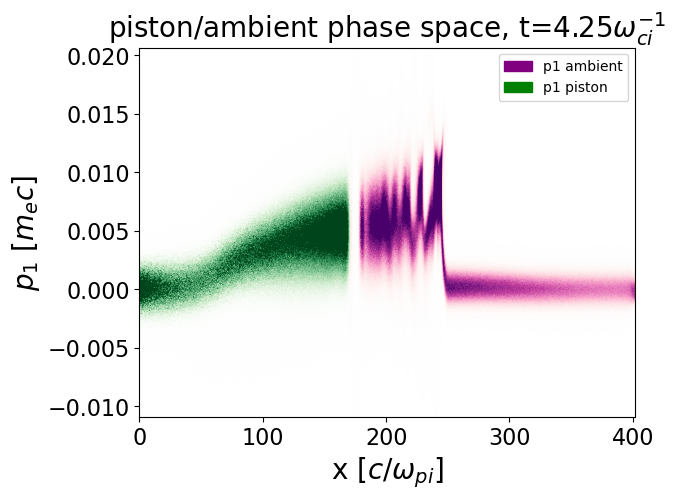

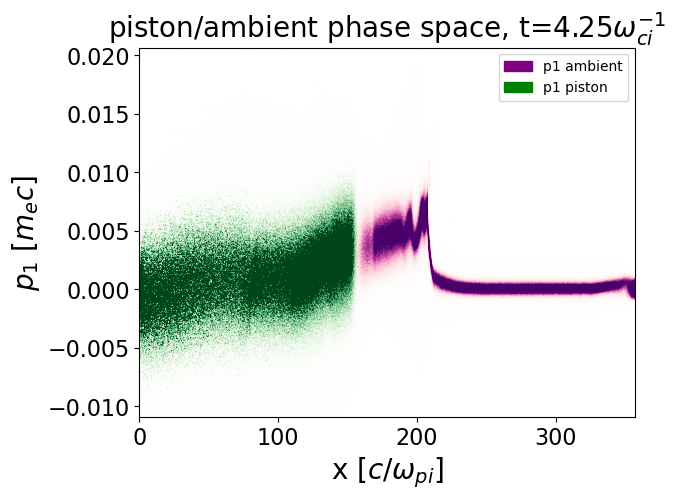

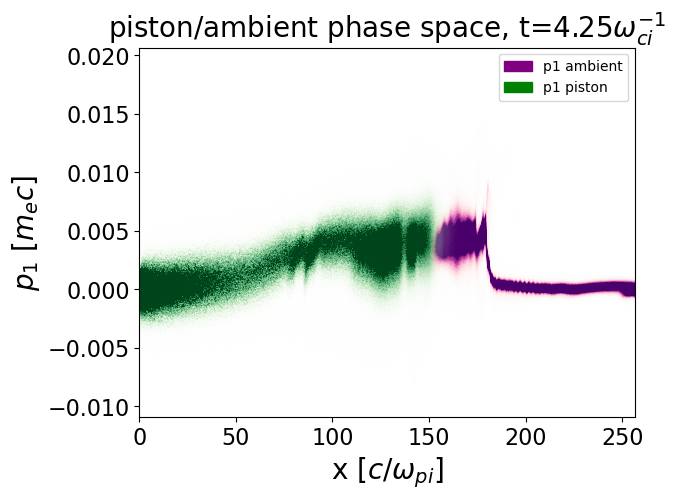

In [55]:
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# Random data
data1 = np.random.random((4,4))

# Create custom colormaps with alpha gradients
cmap1 = pl.cm.RdPu
my_cmap1 = ListedColormap(
    np.column_stack([
        cmap1(np.arange(cmap1.N))[:, :3],
        np.linspace(0, 1, cmap1.N)
    ])
)

cmap2 = pl.cm.Greens
my_cmap2 = ListedColormap(
    np.column_stack([
        cmap2(np.arange(cmap2.N))[:, :3],
        np.linspace(0, 1, cmap2.N)
    ])
)


t = 170
#### 90 DEGREES ####
ambient_phase_space = get_data_at_t(dir90, 'PHA/p1x1/channel', t) + get_data_at_t(dir90, 'PHA/p1x1/background', t) + get_data_at_t(dir90, 'PHA/p1x1/sheathe', t)
si_phase_space = get_data_at_t(dir90, 'PHA/p1x1/si', t)
edens = get_data_at_t(dir90, 'DENSITY/electrons/charge', t)
x = np.arange(edens.run_attrs['SIMULATION']['XMIN'], edens.run_attrs['SIMULATION']['XMAX'], si_phase_space.run_attrs['SIMULATION']['NX']) / ion_inertial_length

purp_patch = mpatches.Patch(color='purple', label='p1 ambient')
grn_patch = mpatches.Patch(color='green', label='p1 piston')
# blk_patch = mpatches.Patch(color='black', label=r'$n_e$')
print(np.shape(ambient_phase_space), np.shape(edens), np.shape(x))

# plt.scatter(x,np.abs(edens/200),c='black')
plot_ambient = osh5vis.osplot(ambient_phase_space[1600:-1200,:],cmap=my_cmap1,vmax = 300,colorbar = False, convert_xaxis = 1/ion_inertial_length, label = "ambient")
plot_piston = osh5vis.osplot(si_phase_space[1600:-1200,:],cmap=my_cmap2,vmax = 300,colorbar = False,label ="piston", convert_xaxis = 1/ion_inertial_length)

plt.title(r'piston/ambient phase space, t=' + f'{np.round(ambient_phase_space.run_attrs["TIME"][0]/ interface.gyrotime,2)}'+ r"$\omega_{ci}^{-1}$")
plt.xlabel(r'x $[c/ω_{pi}]$')
plt.legend(handles=[purp_patch, grn_patch], loc='upper right')
plt.show()
#### END 90 DEGREES ####

#### 60 DEGREES ####
ambient_phase_space = get_data_at_t(dir60, 'PHA/p1x1/channel', t) + get_data_at_t(dir60, 'PHA/p1x1/background', t) + get_data_at_t(dir60, 'PHA/p1x1/sheathe', t)
si_phase_space = get_data_at_t(dir60, 'PHA/p1x1/si', t)
edens = get_data_at_t(dir60, 'DENSITY/electrons/charge', t)
# x = np.arange(edens.run_attrs['SIMULATION']['XMIN'], edens.run_attrs['SIMULATION']['XMAX'], edens.run_attrs['SIMULATION']['NX'])

plot_ambient = osh5vis.osplot(ambient_phase_space[1600:-1200,:],cmap=my_cmap1,vmax = 500,colorbar = False, convert_xaxis = 1/ion_inertial_length, label = "ambient")
plot_piston = osh5vis.osplot(si_phase_space[1600:-1200,:],cmap=my_cmap2,vmax = 150,colorbar = False,label ="piston", convert_xaxis = 1/ion_inertial_length)

plt.title(r'piston/ambient phase space, t=' + f'{np.round(ambient_phase_space.run_attrs["TIME"][0]/ interface.gyrotime,2)}'+ r"$\omega_{ci}^{-1}$")
plt.xlabel(r'x $[c/ω_{pi}]$')
plt.legend(handles=[purp_patch, grn_patch], loc='upper right')
plt.show()
#### END 60 DEGREES ####

#### 45 DEGREES ####
ambient_phase_space = get_data_at_t(dir45, 'PHA/p1x1/channel', t) + get_data_at_t(dir45, 'PHA/p1x1/background', t) + get_data_at_t(dir45, 'PHA/p1x1/sheathe', t)
si_phase_space = get_data_at_t(dir45, 'PHA/p1x1/si', t)
edens = get_data_at_t(dir45, 'DENSITY/electrons/charge', t)
# x = np.arange(edens.run_attrs['SIMULATION']['XMIN'], edens.run_attrs['SIMULATION']['XMAX'], edens.run_attrs['SIMULATION']['NX'])

plot_ambient = osh5vis.osplot(ambient_phase_space[1600:-1200,:],cmap=my_cmap1,vmax = 500,colorbar = False, convert_xaxis = 1/ion_inertial_length, label = "ambient")
plot_piston = osh5vis.osplot(si_phase_space[1600:-1200,:],cmap=my_cmap2,vmax = 400,colorbar = False,label ="piston", convert_xaxis = 1/ion_inertial_length)

plt.title(r'piston/ambient phase space, t=' + f'{np.round(ambient_phase_space.run_attrs["TIME"][0]/ interface.gyrotime,2)}'+ r"$\omega_{ci}^{-1}$")
plt.xlabel(r'x $[c/ω_{pi}]$')
plt.legend(handles=[purp_patch, grn_patch], loc='upper right')
plt.show()
#### END 45 DEGREES ####

